# CART Model for AQI and Concentration Prediction of Pollutants

The Classification and Regression Tree (CART) Algorithm is used to build decision trees based on minimizing the Mean Squared Error. For the initial baseline model, the features that are considered are date-time variables. The date-time variables were split into features such as 'month', 'day', 'hour of day', 'day of year', 'week of year', 'weekday', 'quarter', 'is month start', 'is month end'. 'month', 'weekday', 'quarter', and 'is month start' variables were one-hot encoded to avoid any significance based on its value since it is nominal data. The data was split into train set and last 120 samples (5 days) as validation set. After playing aroud with the hyperparameters, a Random Forest Regressor with 1000 estimators (to prevent overfitting) and max depth of 50 was used to train the model which gave the best results in terms of RMSE values. It is observed that the model follows the trends in the data while predicting.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# Reading the data
df = pd.read_csv("/content/complete_data.csv")
df.head(10)

,Timestamp,Ozone_Concentration,PM2.5_Concentration,PM2.5_Unit,Ozone_AQI,PM2.5_AQI,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,pm10,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide
0,2023-01-05T16:00,23.0,8.8,UG/M3,21.0,37.0,6.637000,64.139565,0.337,11.119281,3.8,154.0,10.100000,7.00
1,2023-01-05T17:00,25.0,7.4,UG/M3,23.0,31.0,7.637000,55.498592,-0.713,10.685391,3.8,147.0,7.400000,5.85
2,2023-01-05T18:00,29.0,6.1,UG/M3,27.0,25.0,8.537001,47.459873,-2.013,13.896187,3.8,140.0,4.950000,4.65
3,2023-01-05T19:00,32.0,5.4,UG/M3,30.0,23.0,8.937000,45.517456,-2.213,13.608762,3.7,135.0,3.850000,4.45
4,2023-01-05T20:00,31.0,4.8,UG/M3,29.0,20.0,8.887000,43.686733,-2.813,14.021525,3.6,132.0,3.400000,4.55
5,2023-01-05T21:00,35.0,4.1,UG/M3,32.0,17.0,8.237000,45.991100,-2.713,11.183201,3.6,136.0,6.950000,5.05
6,2023-01-05T22:00,30.0,3.9,UG/M3,28.0,16.0,7.287000,50.726830,-2.263,7.568566,4.7,152.0,15.400000,5.80
7,2023-01-05T23:00,27.0,4.1,UG/M3,25.0,17.0,5.687000,55.592070,-2.513,9.028754,6.0,175.0,27.200000,6.85
8,2023-01-06T00:00,30.0,4.3,UG/M3,28.0,18.0,5.537000,58.934730,-1.863,6.877789,7.9,210.0,26.742857,9.10
9,2023-01-06T01:00,27.0,4.3,UG/M3,25.0,18.0,5.037000,60.569725,-1.963,7.653705,7.7,220.0,26.285714,9.50


In [3]:
df.tail()

,Timestamp,Ozone_Concentration,PM2.5_Concentration,PM2.5_Unit,Ozone_AQI,PM2.5_AQI,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,pm10,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide
8076,2023-12-08T19:00,34.0,5.1,UG/M3,31.0,21.0,13.237,40.054813,-0.063,14.618837,9.6,218.0,6.9,11.8
8077,2023-12-08T20:00,36.0,4.8,UG/M3,33.0,20.0,13.187,40.331696,-0.013,13.004921,10.0,220.0,8.4,12.1
8078,2023-12-08T21:00,34.0,4.9,UG/M3,31.0,20.0,11.937,46.382700,0.787,9.726665,11.0,230.0,11.1,12.0
8079,2023-12-08T22:00,31.0,4.9,UG/M3,29.0,20.0,9.137,54.107760,0.337,9.422101,12.8,254.0,16.1,11.5
8080,2023-12-08T23:00,20.0,6.3,UG/M3,19.0,26.0,7.637,58.397490,-0.013,10.080000,14.0,285.0,22.2,10.6


In [4]:
df[df['Timestamp'] == '2023-11-04T20:00']

,Timestamp,Ozone_Concentration,PM2.5_Concentration,PM2.5_Unit,Ozone_AQI,PM2.5_AQI,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,pm10,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide
7261,2023-11-04T20:00,41.0,10.6,UG/M3,38.0,44.0,14.537001,40.146267,1.137,9.686609,8.1,208.0,4.9,13.1


#### Checking for null values in the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             8081 non-null   object 
 1   Ozone_Concentration   8081 non-null   float64
 2   PM2.5_Concentration   8081 non-null   float64
 3   PM2.5_Unit            7981 non-null   object 
 4   Ozone_AQI             8081 non-null   float64
 5   PM2.5_AQI             8081 non-null   float64
 6   temperature_2m        8081 non-null   float64
 7   relative_humidity_2m  8081 non-null   float64
 8   dew_point_2m          8081 non-null   float64
 9   wind_speed_10m        8081 non-null   float64
 10  pm10                  8081 non-null   float64
 11  carbon_monoxide       8081 non-null   float64
 12  nitrogen_dioxide      8081 non-null   float64
 13  sulphur_dioxide       8081 non-null   float64
dtypes: float64(12), object(2)
memory usage: 884.0+ KB


#### Adding future timestamps for the week (11/06 to 11/11) to the original dataframe so that the timestamp preprocessing steps are consistent throughtout.

In [6]:
future_weather_df = pd.read_csv("/content/features.csv")

In [7]:
future_weather_df.head(15)

,Timestamp,pm10,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m
0,2023-12-09T00:00,11.2,274.0,20.3,9.5,10.671500,33.0,-4.961855,7.952660
1,2023-12-09T01:00,10.4,266.0,19.0,8.7,9.321500,36.0,-5.005609,11.525623
2,2023-12-09T02:00,9.6,256.0,17.2,7.5,8.821500,41.0,-3.724214,5.600286
3,2023-12-09T03:00,9.1,244.0,15.2,6.6,9.421500,38.0,-4.198785,9.504272
4,2023-12-09T04:00,8.8,232.0,13.1,6.1,9.821500,39.0,-3.493351,7.072878
5,2023-12-09T05:00,8.4,218.0,10.9,5.9,10.321500,33.0,-5.270078,7.636753
6,2023-12-09T06:00,8.1,208.0,9.2,5.7,9.821500,39.0,-3.493351,8.587338
7,2023-12-09T07:00,7.9,201.0,8.0,5.7,9.521500,38.0,-4.109286,7.993297
8,2023-12-09T08:00,7.9,197.0,7.2,5.7,9.421500,32.0,-6.465623,6.989935
9,2023-12-09T09:00,7.9,197.0,7.1,5.8,9.271500,39.0,-3.987010,9.178235


In [8]:
future_weather_df.tail()

,Timestamp,pm10,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m
163,2023-12-15T19:00,19.0,292.0,18.4,8.2,7.8695,38.0,-5.588304,6.877789
164,2023-12-15T20:00,19.0,292.0,18.4,8.2,7.6695,41.0,-4.764543,4.582052
165,2023-12-15T21:00,19.0,292.0,18.4,8.2,7.2195,44.0,-4.234593,3.054701
166,2023-12-15T22:00,19.0,292.0,18.4,8.2,6.5695,47.0,-3.949547,3.319036
167,2023-12-15T23:00,19.0,292.0,18.4,8.2,5.6695,52.0,-3.428018,4.104631


In [9]:
# future_dates_df = pd.DataFrame(pd.date_range('2023-12-04T00:00', '2023-12-08T23:59', freq='1H'), columns = ["Timestamp"])
df = pd.concat((df, future_weather_df))
df.tail()

,Timestamp,Ozone_Concentration,PM2.5_Concentration,PM2.5_Unit,Ozone_AQI,PM2.5_AQI,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,pm10,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide
163,2023-12-15T19:00,NaN,NaN,NaN,NaN,NaN,7.8695,38.0,-5.588304,6.877789,19.0,292.0,18.4,8.2
164,2023-12-15T20:00,NaN,NaN,NaN,NaN,NaN,7.6695,41.0,-4.764543,4.582052,19.0,292.0,18.4,8.2
165,2023-12-15T21:00,NaN,NaN,NaN,NaN,NaN,7.2195,44.0,-4.234593,3.054701,19.0,292.0,18.4,8.2
166,2023-12-15T22:00,NaN,NaN,NaN,NaN,NaN,6.5695,47.0,-3.949547,3.319036,19.0,292.0,18.4,8.2
167,2023-12-15T23:00,NaN,NaN,NaN,NaN,NaN,5.6695,52.0,-3.428018,4.104631,19.0,292.0,18.4,8.2


In [10]:
df.head()

,Timestamp,Ozone_Concentration,PM2.5_Concentration,PM2.5_Unit,Ozone_AQI,PM2.5_AQI,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,pm10,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide
0,2023-01-05T16:00,23.0,8.8,UG/M3,21.0,37.0,6.637000,64.139565,0.337,11.119281,3.8,154.0,10.10,7.00
1,2023-01-05T17:00,25.0,7.4,UG/M3,23.0,31.0,7.637000,55.498592,-0.713,10.685391,3.8,147.0,7.40,5.85
2,2023-01-05T18:00,29.0,6.1,UG/M3,27.0,25.0,8.537001,47.459873,-2.013,13.896187,3.8,140.0,4.95,4.65
3,2023-01-05T19:00,32.0,5.4,UG/M3,30.0,23.0,8.937000,45.517456,-2.213,13.608762,3.7,135.0,3.85,4.45
4,2023-01-05T20:00,31.0,4.8,UG/M3,29.0,20.0,8.887000,43.686733,-2.813,14.021525,3.6,132.0,3.40,4.55


In [11]:
# convert timestamp to datetime datatype
df['Date'] = pd.to_datetime(df['Timestamp'])

# set the format for the datetime
df['Date'] = df['Date'].dt.strftime('%Y-%m-%dT%H:%M')

# extract the year from the timestamp
df['year'] = pd.DatetimeIndex(df['Date']).year

# extract the month of the year from timestamp
df['month'] = pd.DatetimeIndex(df['Date']).month

# extract the day of the month from timestamp
df['day'] = pd.DatetimeIndex(df['Date']).day

# extract the hour of the day from timestamp
df['hourofday'] = pd.DatetimeIndex(df['Date']).hour

# extract the day of the year from timestamp
df['dayofyear'] = pd.DatetimeIndex(df['Date']).dayofyear

# extract the week of the year from timestamp
df['weekofyear'] = pd.DatetimeIndex(df['Date']).weekofyear

# extract the day of the week from timestamp
df['weekday'] = pd.DatetimeIndex(df['Date']).weekday

# extract the quarter of the year in which the month belongs to
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter

# extract boolean which corresponds to start and end of the month
df['is_month_start'] = pd.DatetimeIndex(df['Date']).is_month_start
df['is_month_end'] = pd.DatetimeIndex(df['Date']).is_month_end

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8249 entries, 0 to 167
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             8249 non-null   object 
 1   Ozone_Concentration   8081 non-null   float64
 2   PM2.5_Concentration   8081 non-null   float64
 3   PM2.5_Unit            7981 non-null   object 
 4   Ozone_AQI             8081 non-null   float64
 5   PM2.5_AQI             8081 non-null   float64
 6   temperature_2m        8249 non-null   float64
 7   relative_humidity_2m  8249 non-null   float64
 8   dew_point_2m          8249 non-null   float64
 9   wind_speed_10m        8249 non-null   float64
 10  pm10                  8249 non-null   float64
 11  carbon_monoxide       8249 non-null   float64
 12  nitrogen_dioxide      8249 non-null   float64
 13  sulphur_dioxide       8249 non-null   float64
 14  Date                  8249 non-null   object 
 15  year                  

<ipython-input-11-d074623d198b>:23: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = pd.DatetimeIndex(df['Date']).weekofyear


#### Intuitively selected a set of columns from the original columns that are considered as features while fitting the Decision Trees

In [12]:
considered_cols = ['month', 'day', 'hourofday', 'dayofyear', 'weekofyear', 'weekday',
              'quarter', 'is_month_start', 'is_month_end', 'temperature_2m', 'relative_humidity_2m',
              'dew_point_2m', 'wind_speed_10m', 'pm10', 'carbon_monoxide',
              'nitrogen_dioxide', 'sulphur_dioxide']

pred_cols = ['Ozone_Concentration', 'Ozone_AQI', 'PM2.5_Concentration', 'PM2.5_AQI' ]

In [13]:
df.columns

Index(['Timestamp', 'Ozone_Concentration', 'PM2.5_Concentration',
       'PM2.5_Unit ', 'Ozone_AQI', 'PM2.5_AQI', 'temperature_2m',
       'relative_humidity_2m', 'dew_point_2m', 'wind_speed_10m', 'pm10',
       'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide', 'Date',
       'year', 'month', 'day', 'hourofday', 'dayofyear', 'weekofyear',
       'weekday', 'quarter', 'is_month_start', 'is_month_end'],
      dtype='object')

In [14]:
df_curr = df[considered_cols + pred_cols]
df_curr.head()

,month,day,hourofday,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end,temperature_2m,...,dew_point_2m,wind_speed_10m,pm10,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,Ozone_Concentration,Ozone_AQI,PM2.5_Concentration,PM2.5_AQI
0,1,5,16,5,1,3,1,False,False,6.637000,...,0.337,11.119281,3.8,154.0,10.10,7.00,23.0,21.0,8.8,37.0
1,1,5,17,5,1,3,1,False,False,7.637000,...,-0.713,10.685391,3.8,147.0,7.40,5.85,25.0,23.0,7.4,31.0
2,1,5,18,5,1,3,1,False,False,8.537001,...,-2.013,13.896187,3.8,140.0,4.95,4.65,29.0,27.0,6.1,25.0
3,1,5,19,5,1,3,1,False,False,8.937000,...,-2.213,13.608762,3.7,135.0,3.85,4.45,32.0,30.0,5.4,23.0
4,1,5,20,5,1,3,1,False,False,8.887000,...,-2.813,14.021525,3.6,132.0,3.40,4.55,31.0,29.0,4.8,20.0


### One hot enconding the year, month, weekday, quarter, is_month_start, and is_month_end columns since these are nominal data

In [15]:
df_curr = pd.get_dummies(df_curr, columns=['month'], drop_first=True, prefix='month')
df_curr = pd.get_dummies(df_curr, columns=['weekday'], drop_first=True, prefix='wday')
df_curr = pd.get_dummies(df_curr, columns=['quarter'], drop_first=True, prefix='qrtr')
df_curr = pd.get_dummies(df_curr, columns=['is_month_start'], drop_first=True, prefix='m_start')
df_curr = pd.get_dummies(df_curr, columns=['is_month_end'], drop_first=True, prefix='m_end')

#### Separating features of the concurrent timestamps to fit an ML model and features of the future timestamps for predictions.

In [16]:
df_future = df_curr.iloc[-len(future_weather_df) : , :]
df_temp = df_curr.iloc[:-len(future_weather_df) , : ]
df_future.head()

,day,hourofday,dayofyear,weekofyear,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,pm10,carbon_monoxide,...,wday_2,wday_3,wday_4,wday_5,wday_6,qrtr_2,qrtr_3,qrtr_4,m_start_True,m_end_True
0,9,0,343,49,10.6715,33.0,-4.961855,7.952660,11.2,274.0,...,0,0,0,1,0,0,0,1,0,0
1,9,1,343,49,9.3215,36.0,-5.005609,11.525623,10.4,266.0,...,0,0,0,1,0,0,0,1,0,0
2,9,2,343,49,8.8215,41.0,-3.724214,5.600286,9.6,256.0,...,0,0,0,1,0,0,0,1,0,0
3,9,3,343,49,9.4215,38.0,-4.198785,9.504272,9.1,244.0,...,0,0,0,1,0,0,0,1,0,0
4,9,4,343,49,9.8215,39.0,-3.493351,7.072878,8.8,232.0,...,0,0,0,1,0,0,0,1,0,0


In [17]:
# it is expected that AQI_PM2.5 will have all missing values
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day                   168 non-null    int64  
 1   hourofday             168 non-null    int64  
 2   dayofyear             168 non-null    int64  
 3   weekofyear            168 non-null    int64  
 4   temperature_2m        168 non-null    float64
 5   relative_humidity_2m  168 non-null    float64
 6   dew_point_2m          168 non-null    float64
 7   wind_speed_10m        168 non-null    float64
 8   pm10                  168 non-null    float64
 9   carbon_monoxide       168 non-null    float64
 10  nitrogen_dioxide      168 non-null    float64
 11  sulphur_dioxide       168 non-null    float64
 12  Ozone_Concentration   0 non-null      float64
 13  Ozone_AQI             0 non-null      float64
 14  PM2.5_Concentration   0 non-null      float64
 15  PM2.5_AQI             0

In [18]:
df_temp.head()

,day,hourofday,dayofyear,weekofyear,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,pm10,carbon_monoxide,...,wday_2,wday_3,wday_4,wday_5,wday_6,qrtr_2,qrtr_3,qrtr_4,m_start_True,m_end_True
0,5,16,5,1,6.637000,64.139565,0.337,11.119281,3.8,154.0,...,0,1,0,0,0,0,0,0,0,0
1,5,17,5,1,7.637000,55.498592,-0.713,10.685391,3.8,147.0,...,0,1,0,0,0,0,0,0,0,0
2,5,18,5,1,8.537001,47.459873,-2.013,13.896187,3.8,140.0,...,0,1,0,0,0,0,0,0,0,0
3,5,19,5,1,8.937000,45.517456,-2.213,13.608762,3.7,135.0,...,0,1,0,0,0,0,0,0,0,0
4,5,20,5,1,8.887000,43.686733,-2.813,14.021525,3.6,132.0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8081 entries, 0 to 8080
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day                   8081 non-null   int64  
 1   hourofday             8081 non-null   int64  
 2   dayofyear             8081 non-null   int64  
 3   weekofyear            8081 non-null   int64  
 4   temperature_2m        8081 non-null   float64
 5   relative_humidity_2m  8081 non-null   float64
 6   dew_point_2m          8081 non-null   float64
 7   wind_speed_10m        8081 non-null   float64
 8   pm10                  8081 non-null   float64
 9   carbon_monoxide       8081 non-null   float64
 10  nitrogen_dioxide      8081 non-null   float64
 11  sulphur_dioxide       8081 non-null   float64
 12  Ozone_Concentration   8081 non-null   float64
 13  Ozone_AQI             8081 non-null   float64
 14  PM2.5_Concentration   8081 non-null   float64
 15  PM2.5_AQI            

In [20]:
df_temp = df_temp.dropna()

#### Splitting train and validation samples for performance comparison
> Validation samples are considered for the last 5 days of the available dataset. i.e. (24 hours x 5 days = 120 samples)

In [21]:
df_train = df_temp.iloc[:-120, :]
df_test = df_temp.iloc[-120:, :]
df_train.head()

,day,hourofday,dayofyear,weekofyear,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,pm10,carbon_monoxide,...,wday_2,wday_3,wday_4,wday_5,wday_6,qrtr_2,qrtr_3,qrtr_4,m_start_True,m_end_True
0,5,16,5,1,6.637000,64.139565,0.337,11.119281,3.8,154.0,...,0,1,0,0,0,0,0,0,0,0
1,5,17,5,1,7.637000,55.498592,-0.713,10.685391,3.8,147.0,...,0,1,0,0,0,0,0,0,0,0
2,5,18,5,1,8.537001,47.459873,-2.013,13.896187,3.8,140.0,...,0,1,0,0,0,0,0,0,0,0
3,5,19,5,1,8.937000,45.517456,-2.213,13.608762,3.7,135.0,...,0,1,0,0,0,0,0,0,0,0
4,5,20,5,1,8.887000,43.686733,-2.813,14.021525,3.6,132.0,...,0,1,0,0,0,0,0,0,0,0


In [22]:
df_test.head()

,day,hourofday,dayofyear,weekofyear,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,pm10,carbon_monoxide,...,wday_2,wday_3,wday_4,wday_5,wday_6,qrtr_2,qrtr_3,qrtr_4,m_start_True,m_end_True
7961,4,0,338,49,7.187,87.41939,5.237,22.148045,10.9,239.0,...,0,0,0,0,0,0,0,1,0,0
7962,4,1,338,49,6.987,72.27675,2.337,20.833395,11.0,244.0,...,0,0,0,0,0,0,0,1,0,0
7963,4,2,338,49,7.087,69.76614,1.937,17.873556,10.1,252.0,...,0,0,0,0,0,0,0,1,0,0
7964,4,3,338,49,7.187,68.55194,1.787,17.026896,9.0,258.0,...,0,0,0,0,0,0,0,1,0,0
7965,4,4,338,49,6.937,69.23889,1.687,17.317460,8.1,262.0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
X_train = np.array(df_train.drop(pred_cols, axis = 1))

In [24]:
X_test = np.array(df_test.drop(pred_cols, axis = 1))

In [25]:
X_future = np.array(df_future.drop(pred_cols, axis = 1))

In [26]:
df_future.tail()

,day,hourofday,dayofyear,weekofyear,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,pm10,carbon_monoxide,...,wday_2,wday_3,wday_4,wday_5,wday_6,qrtr_2,qrtr_3,qrtr_4,m_start_True,m_end_True
163,15,19,349,50,7.8695,38.0,-5.588304,6.877789,19.0,292.0,...,0,0,1,0,0,0,0,1,0,0
164,15,20,349,50,7.6695,41.0,-4.764543,4.582052,19.0,292.0,...,0,0,1,0,0,0,0,1,0,0
165,15,21,349,50,7.2195,44.0,-4.234593,3.054701,19.0,292.0,...,0,0,1,0,0,0,0,1,0,0
166,15,22,349,50,6.5695,47.0,-3.949547,3.319036,19.0,292.0,...,0,0,1,0,0,0,0,1,0,0
167,15,23,349,50,5.6695,52.0,-3.428018,4.104631,19.0,292.0,...,0,0,1,0,0,0,0,1,0,0


# Building Prediction Models

## XG Boost Regressor

### Import Libraries

In [27]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt


RMSE on train data for Ozone_Concentration is : 1.208195610107626
R2 score on train data for Ozone_Concentration is: 0.9913926028713385

RMSE on validation data for Ozone_Concentration is: 5.729234144916483
R2 score on validation data for Ozone_Concentration is: 0.14034842393588742

RMSE on train data for Ozone_AQI is : 1.1951638038918566
R2 score on train data for Ozone_AQI is: 0.9899718141494659

RMSE on validation data for Ozone_AQI is: 5.338481592865282
R2 score on validation data for Ozone_AQI is: 0.10563662799869966

RMSE on train data for PM2.5_Concentration is : 0.8925894949788078
R2 score on train data for PM2.5_Concentration is: 0.972662608267872

RMSE on validation data for PM2.5_Concentration is: 3.512922698371742
R2 score on validation data for PM2.5_Concentration is: -0.5046329257022133

RMSE on train data for PM2.5_AQI is : 1.1572711391387034
R2 score on train data for PM2.5_AQI is: 0.9965061388299807

RMSE on validation data for PM2.5_AQI is: 11.809400386562887
R2 score

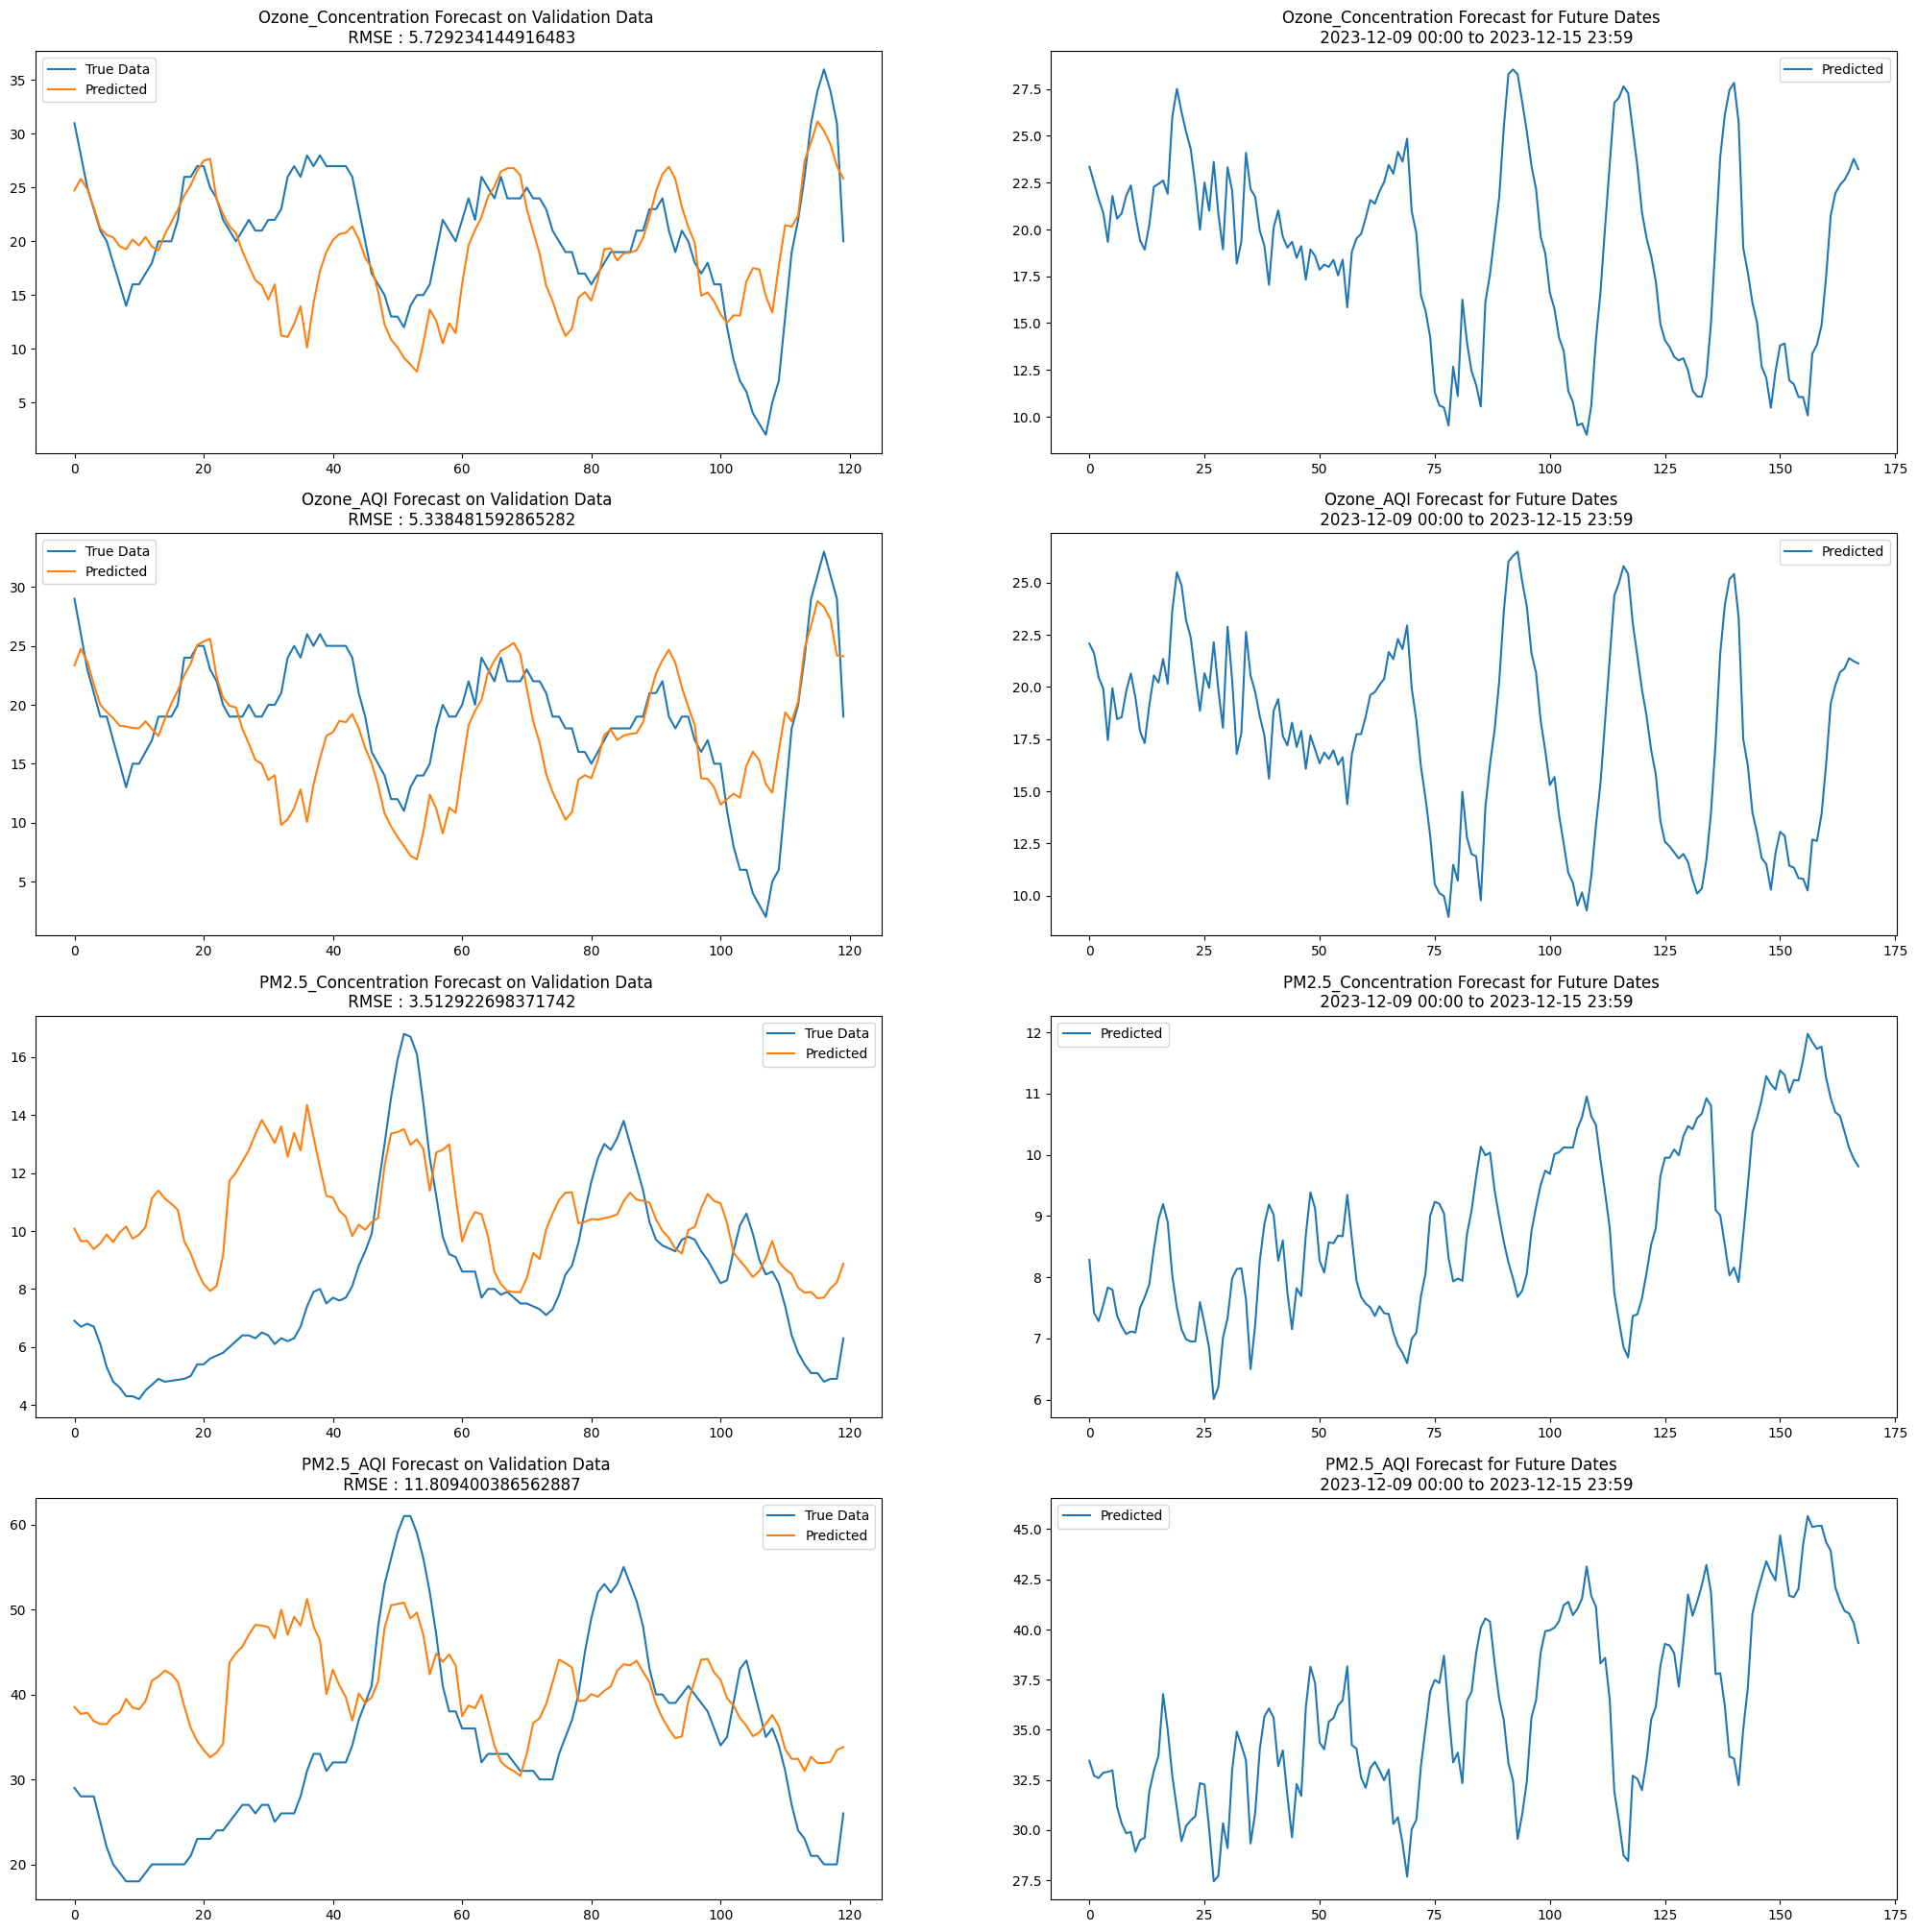

In [28]:
from xgboost import XGBRegressor
plt.figure(figsize = (25, 25))
id = 1
final_result = np.zeros((168,4))

for i, var in enumerate(pred_cols):
  # defining the model
  y_train = np.array(df_train[var])
  y_test = np.array(df_test[var])

  dtree = XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=50, eta=0.01,
                       subsample=0.7, colsample_bytree=0.6, random_state = 43, gamma = 10)

  # fit the model to the train data
  dtree.fit(X_train, y_train)

  # make predictions on the train data

  pred_train_tree= dtree.predict(X_train)
  print(f'RMSE on train data for {var} is :', np.sqrt(mean_squared_error(y_train,pred_train_tree)))
  print(f'R2 score on train data for {var} is:', r2_score(y_train, pred_train_tree))
  print()

  # plt.subplot(4,3, id)
  # idx = range(len(y_train))
  # plt.title(f'{var} Forecast on Train Data \n RMSE: {np.sqrt(mean_squared_error(y_train,pred_train_tree))}')
  # plt.plot(idx, y_train, label = 'True Data')
  # plt.plot(idx, pred_train_tree, label = 'Predicted')
  # plt.legend()

  # id+=1

  pred_test_tree = dtree.predict(X_test)

  print(f'RMSE on validation data for {var} is:', np.sqrt(mean_squared_error(y_test,pred_test_tree)))
  print(f'R2 score on validation data for {var} is:', r2_score(y_test, pred_test_tree))
  print()

  plt.subplot(4,2, id)
  idx = range(len(y_test))
  plt.title(f'{var} Forecast on Validation Data \n RMSE : {np.sqrt(mean_squared_error(y_test,pred_test_tree))}')
  plt.plot(idx, y_test, label = 'True Data')
  plt.plot(idx, pred_test_tree, label = 'Predicted')
  plt.legend()

  id+=1

  plt.subplot(4,2, id)
  pred_future_tree = dtree.predict(X_future)

  plt.title(f'{var} Forecast for Future Dates \n 2023-12-09 00:00 to 2023-12-15 23:59')

  idx = range(len(pred_future_tree))

  final_result[:, i] = pred_future_tree

  plt.plot(idx, pred_future_tree, label = 'Predicted')
  plt.legend()

  id+=1

In [29]:
np.savetxt(f'XGB_final_result.csv', final_result, delimiter=",", header= "O, AQI_O, PM2.5, AQI_PM2.5", comments='')

# Random Forest Regressor

RMSE on train data for Ozone_Concentration is : 1.8786950350069636
R2 score on train data for Ozone_Concentration is: 0.979188187270073

RMSE on validation data for Ozone_Concentration is: 6.822870726444167
R2 score on validation data for Ozone_Concentration is: -0.21916814336760426

RMSE on train data for Ozone_AQI is : 1.741804375625372
R2 score on train data for Ozone_AQI is: 0.9787006541849294

RMSE on validation data for Ozone_AQI is: 6.200638945038561
R2 score on validation data for Ozone_AQI is: -0.20656686056194506

RMSE on train data for PM2.5_Concentration is : 0.7725700803556522
R2 score on train data for PM2.5_Concentration is: 0.9795200305907338

RMSE on validation data for PM2.5_Concentration is: 3.9032131002577053
R2 score on validation data for PM2.5_Concentration is: -0.8575388259989214

RMSE on train data for PM2.5_AQI is : 2.7625546446422913
R2 score on train data for PM2.5_AQI is: 0.9800906466837018

RMSE on validation data for PM2.5_AQI is: 14.048767791157331
R2 sc

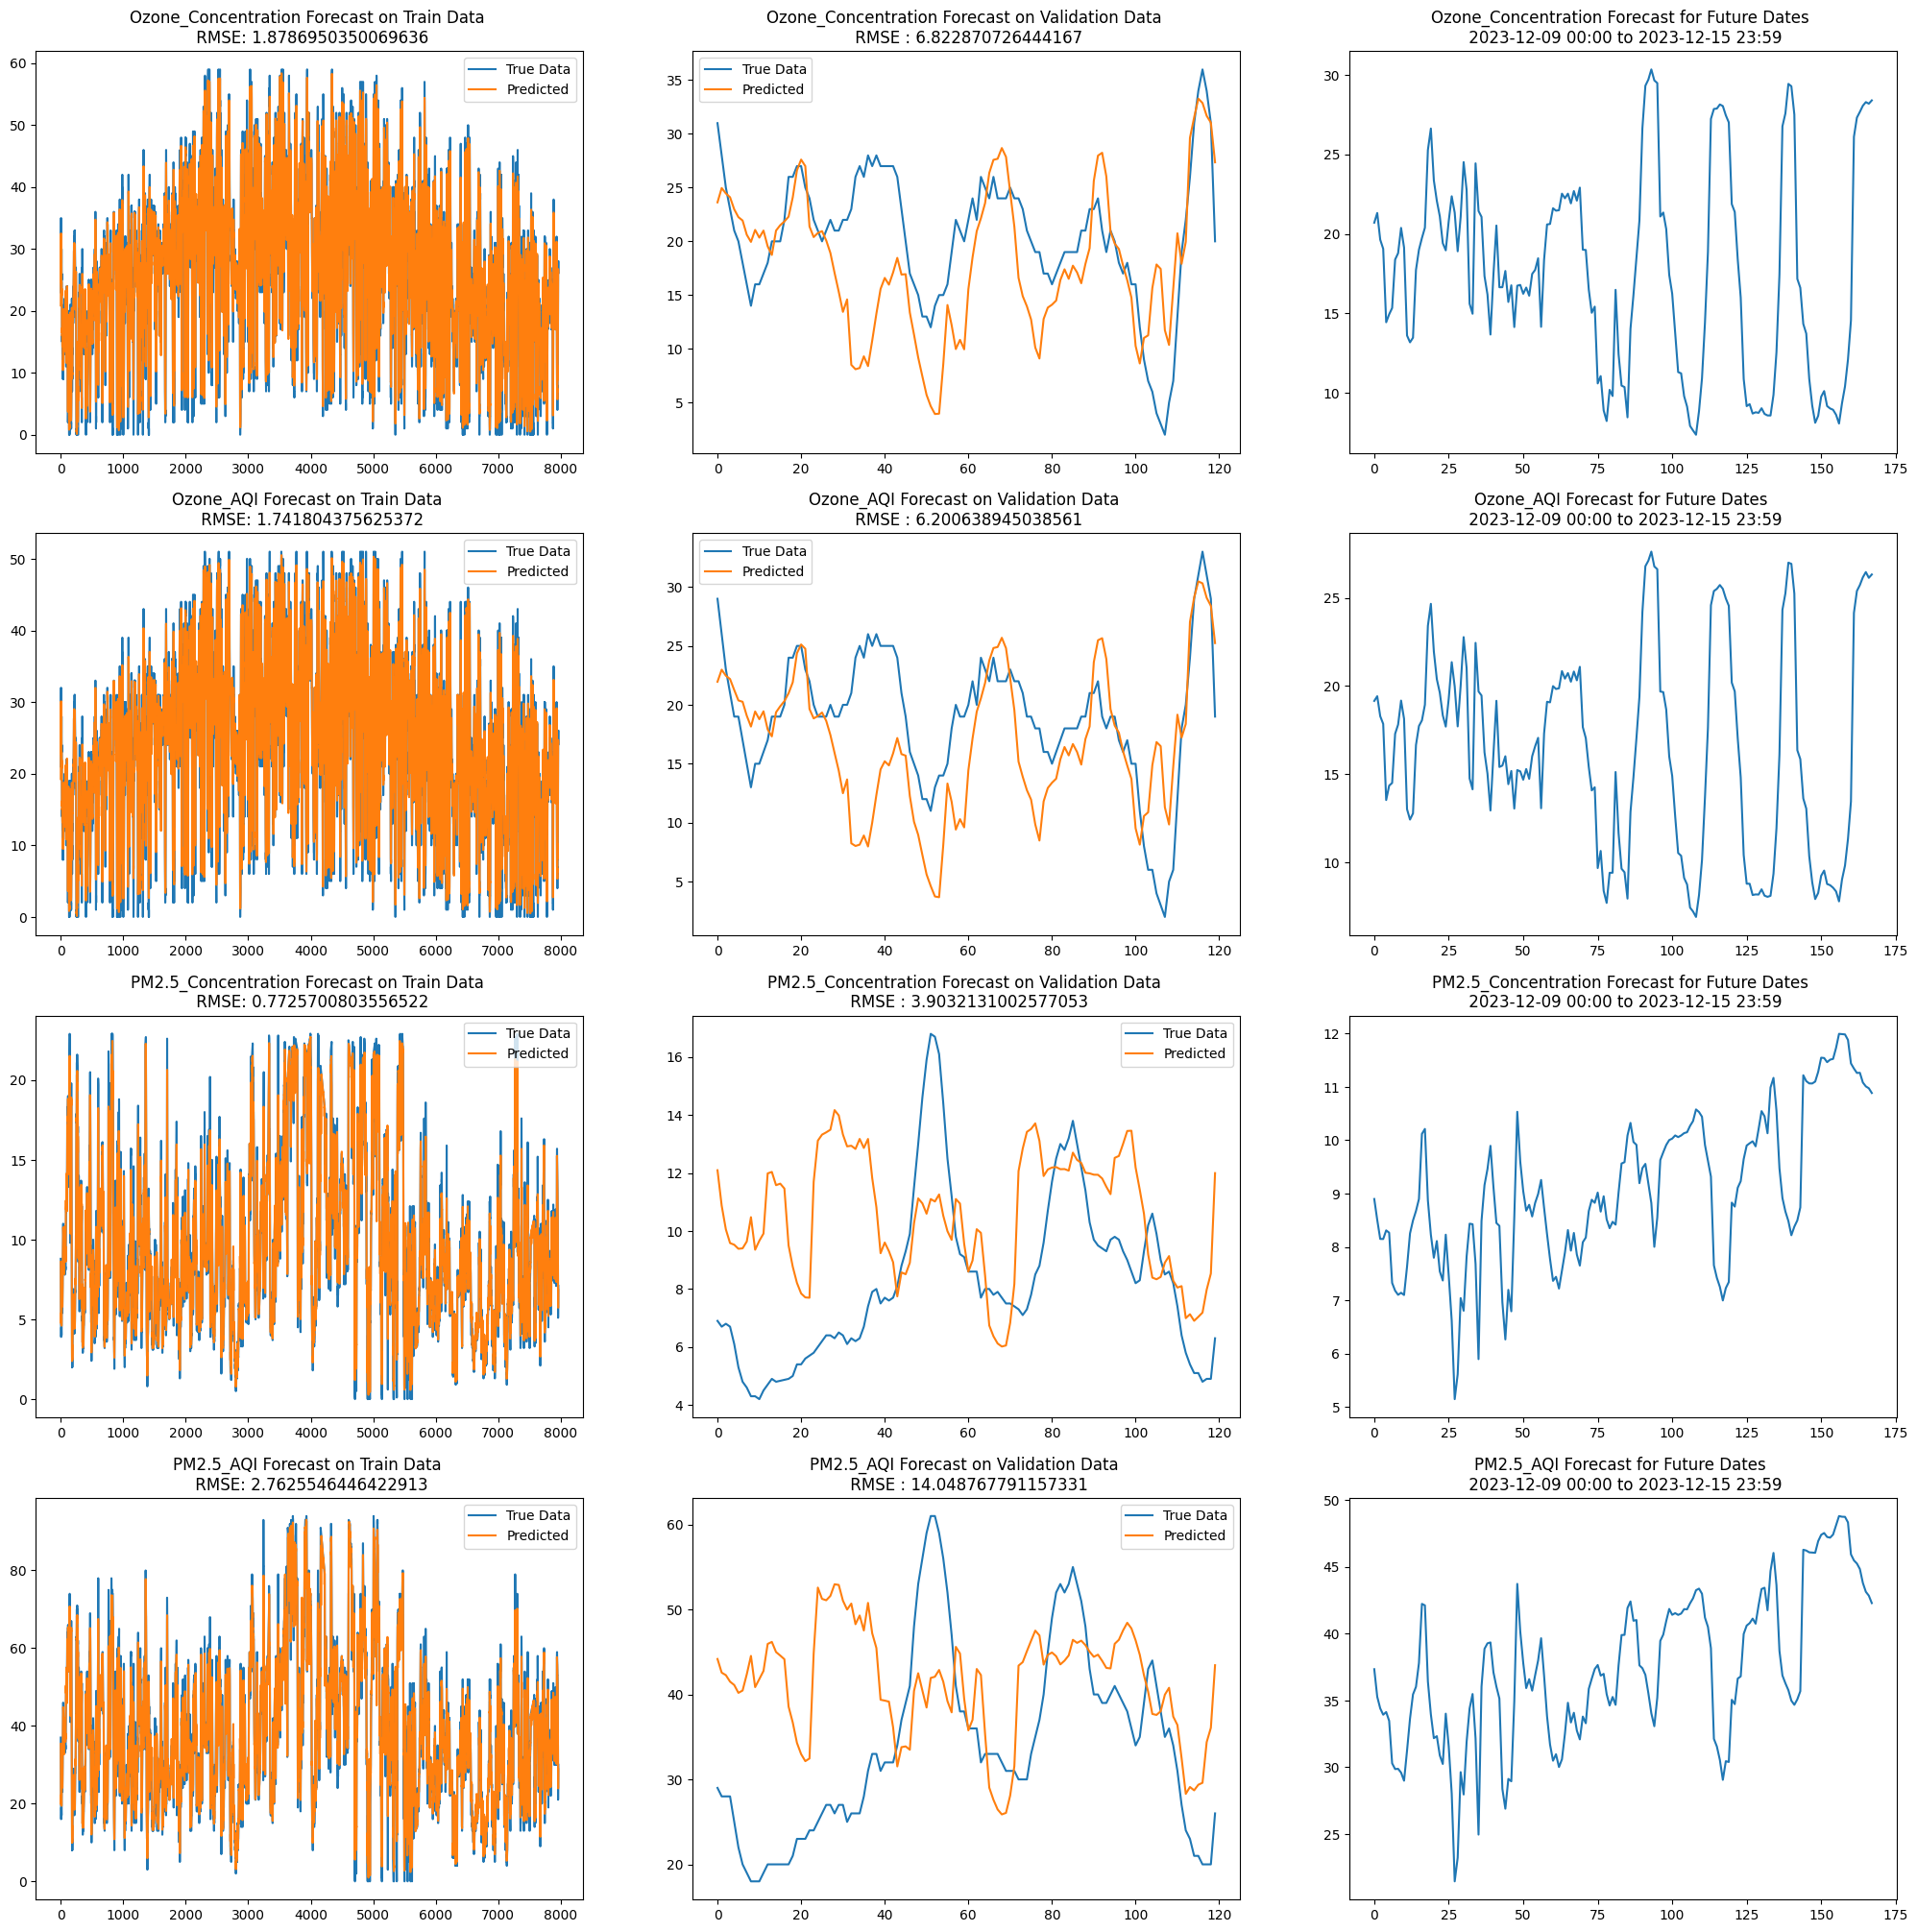

In [30]:
plt.figure(figsize = (25, 25))
id = 1
final_result = np.zeros((168,4))

for i, var in enumerate(pred_cols):
  # defining the model
  y_train = np.array(df_train[var])
  y_test = np.array(df_test[var])

  dtree = RandomForestRegressor(n_estimators = 1000, max_depth = 50, min_samples_split = 2,
                                min_samples_leaf = 2, random_state = 43)

  # fit the model to the train data
  dtree.fit(X_train, y_train)

  # make predictions on the train data

  pred_train_tree= dtree.predict(X_train)
  print(f'RMSE on train data for {var} is :', np.sqrt(mean_squared_error(y_train,pred_train_tree)))
  print(f'R2 score on train data for {var} is:', r2_score(y_train, pred_train_tree))
  print()

  plt.subplot(4,3, id)
  idx = range(len(y_train))
  plt.title(f'{var} Forecast on Train Data \n RMSE: {np.sqrt(mean_squared_error(y_train,pred_train_tree))}')
  plt.plot(idx, y_train, label = 'True Data')
  plt.plot(idx, pred_train_tree, label = 'Predicted')
  plt.legend()

  id+=1

  pred_test_tree = dtree.predict(X_test)

  print(f'RMSE on validation data for {var} is:', np.sqrt(mean_squared_error(y_test,pred_test_tree)))
  print(f'R2 score on validation data for {var} is:', r2_score(y_test, pred_test_tree))
  print()

  plt.subplot(4,3, id)
  idx = range(len(y_test))
  plt.title(f'{var} Forecast on Validation Data \n RMSE : {np.sqrt(mean_squared_error(y_test,pred_test_tree))}')
  plt.plot(idx, y_test, label = 'True Data')
  plt.plot(idx, pred_test_tree, label = 'Predicted')
  plt.legend()

  id+=1

  plt.subplot(4,3, id)
  pred_future_tree = dtree.predict(X_future)

  plt.title(f'{var} Forecast for Future Dates \n 2023-12-09 00:00 to 2023-12-15 23:59')

  idx = range(len(pred_future_tree))

  final_result[:, i] = pred_future_tree

  plt.plot(idx, pred_future_tree)

  id+=1